# Breakdown 

This practice I completed is use case of a linear regression model. First I will be hardcoding the model and then checking with the libraries

## Scenerio
I am working with a retail chain that wants to predict its monthly sales. This will help their inventory management, staff scheduling, and financial planning. 

## Features
* Advertising Spend: Monthly budget going to marketing campaigns
* Promotional Discount: Avg discount offered monthly
* Competitor Price Index: Measure of competitors pricing (>1 means competitors or more expensive)
* Consumer Confidence Index: Economic indicator of consumer optimism
* Seasonality: Captures yearly patterns in sale

## Target Variable
* Monthly Sales: Total sales for each month

## Data Prep
Creating synthetic data to simulate real-world scenerio. 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
#Data Generation 
np.random.seed(42)
dates = pd.date_range(start = '2020-01-01', end= '2023-12-31', freq = 'ME') 
data = pd.DataFrame({ 
    'date': dates,
    'advertising_spend': np.random.randint(50000, 150000, size=len(dates)),
    'promo_discount': np.random.uniform(0.05, 0.25, size=len(dates)),
    'competitor_price_index': np.random.uniform(0.8, 1.2, size=len(dates)),
    'consumer_confidence_index': np.random.uniform(80, 120, size=len(dates)),
    'seasonality': np.sin(np.arange(len(dates)) * (2 * np.pi / 12))
})

data['monthly_sales'] = (
    500000 +
    50 * data['advertising_spend'] +
    -1000000 * data['promo_discount'] +
    200000 * data['competitor_price_index'] +
    5000 * data['consumer_confidence_index'] +
    100000 * data['seasonality'] +
    np.random.normal(0, 50000, size=len(dates))
)

In [6]:
#Data prep
features = ['advertising_spend', 'promo_discount', 'competitor_price_index', 'consumer_confidence_index', 'seasonality']
X = data[features]
y = data['monthly_sales']

In [7]:
#Standarize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
#Manually implementing linear regression
def manual_linear_regression(X, y): 
    #adding columns of ones to X for intercept term
    X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))

    #calculating coefficients using equation
    coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

    return coefficients

def manual_predict(X, coefficients): 
    X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))
    return X_with_intercept @ coefficients

In [12]:
#manual fit
manual_coefficients = manual_linear_regression(X_train, y_train)

In [13]:
#make predictions manually
y_pred_manual = manual_predict(X_test, manual_coefficients)

In [16]:
#calculating manual MSE and R-squared
mse_manual = np.mean((y_test - y_pred_manual) ** 2)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred_manual) ** 2)
r2_manual = 1 - (ss_residual / ss_total)

In [17]:
print("Manual Linear Regression Results:")
print(f"Coefficients: {manual_coefficients[1:]}")
print(f"Intercept: {manual_coefficients[0]}")
print(f"Mean Squared Error: {mse_manual}")
print(f"R-squared Score: {r2_manual}")

Manual Linear Regression Results:
Coefficients: [1473075.61583119  -58686.51931866   22388.7388028    62176.00957318
   70199.77261605]
Intercept: 6071024.540758734
Mean Squared Error: 2236100009.3382754
R-squared Score: 0.9991894497894311


In [20]:
#now I deploy sckit-leanr for comparison
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_sklearn = model.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

In [21]:
print("\nScikit-learn Linear Regression Results:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse_sklearn}")
print(f"R-squared Score: {r2_sklearn}")


Scikit-learn Linear Regression Results:
Coefficients: [1473075.61583119  -58686.51931866   22388.7388028    62176.00957318
   70199.77261605]
Intercept: 6071024.540758735
Mean Squared Error: 2236100009.3382444
R-squared Score: 0.9991894497894311


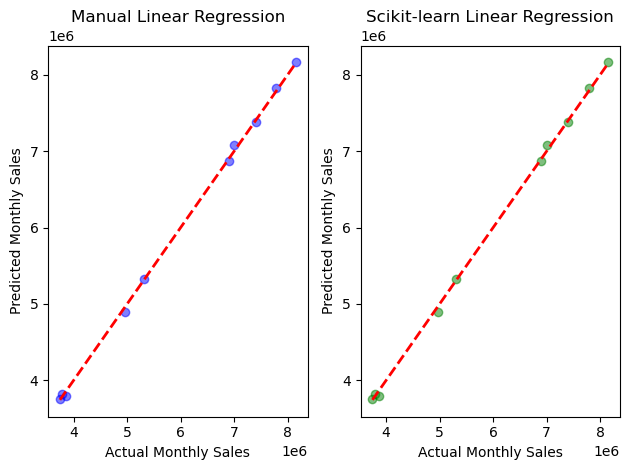

In [23]:
#visualizing result
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Monthly Sales")
plt.ylabel("Predicted Monthly Sales")
plt.title("Manual Linear Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Monthly Sales")
plt.ylabel("Predicted Monthly Sales")
plt.title("Scikit-learn Linear Regression")

plt.tight_layout()
plt.show()

In [24]:
#Comparing Predicition
print("\nComparison of predictions:")
comparison = pd.DataFrame({
    'Actual': y_test,
    'Manual Prediction': y_pred_manual,
    'Sklearn Prediction': y_pred_sklearn
})
print(comparison.head())


Comparison of predictions:
          Actual  Manual Prediction  Sklearn Prediction
27  7.783837e+06       7.832683e+06        7.832683e+06
40  3.865290e+06       3.793241e+06        3.793241e+06
26  4.960563e+06       4.890651e+06        4.890651e+06
43  7.404305e+06       7.384183e+06        7.384183e+06
24  7.005974e+06       7.086369e+06        7.086369e+06


In [25]:
# Calculate and print the difference between manual and sklearn predictions
prediction_difference = np.abs(y_pred_manual - y_pred_sklearn)
print(f"\nAverage difference between manual and sklearn predictions: {np.mean(prediction_difference):.2f}")
print(f"Maximum difference between manual and sklearn predictions: {np.max(prediction_difference):.2f}")


Average difference between manual and sklearn predictions: 0.00
Maximum difference between manual and sklearn predictions: 0.00


In [ ]:
#SUCCESSSSS